In [26]:
import zipfile
pascal3category = zipfile.ZipFile('/content/drive/MyDrive/Emotion_rec Data/Balanced Image data.zip', 'r')
pascal3category = pascal3category.extractall('/content/')

# Image Recognition

In [ ]:
import numpy as np
import argparse
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
# plots accuracy and loss curves
def plot_model_history(model_history):
    """
    Plot Accuracy and Loss curves given the model_history
    """
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    fig.savefig('plot.png')
    plt.show()

# Define data generators
train_dir = '/content/Balanced Image data/Train_Croped_faces'
val_dir = '/content/Balanced Image data/Val_Croped_faces'
test_dir = '/content/Balanced Image data/Test_Croped_faces'

batch_size = 64
num_epoch = 50

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

test_generator = val_datagen.flow_from_directory(
        test_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

# Create the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

# If you want to train the same model or try other models, go for this

model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])
step_size_train=train_generator.n//train_generator.batch_size
val_size=validation_generator.n//validation_generator.batch_size
model_info = model.fit_generator(
        train_generator,
        steps_per_epoch=step_size_train,
        epochs=num_epoch,
        validation_data=validation_generator,
        validation_steps=val_size)

model.save_weights('image_model.h5')

Found 2585 images belonging to 7 classes.
Found 1349 images belonging to 7 classes.
Found 3934 images belonging to 7 classes.
Epoch 1/50
40/40 [==============================] - 7s 169ms/step - loss: 1.8284 - accuracy: 0.3296 - val_loss: 1.9421 - val_accuracy: 0.2031
Epoch 2/50
40/40 [==============================] - 7s 164ms/step - loss: 1.7896 - accuracy: 0.3403 - val_loss: 1.9541 - val_accuracy: 0.2024
Epoch 3/50
40/40 [==============================] - 7s 164ms/step - loss: 1.7231 - accuracy: 0.3630 - val_loss: 2.0486 - val_accuracy: 0.1994
Epoch 4/50
40/40 [==============================] - 7s 164ms/step - loss: 1.6374 - accuracy: 0.4133 - val_loss: 2.1235 - val_accuracy: 0.1987
Epoch 5/50
40/40 [==============================] - 7s 164ms/step - loss: 1.5838 - accuracy: 0.4383 - val_loss: 2.1618 - val_accuracy: 0.2277
Epoch 6/50
40/40 [==============================] - 7s 165ms/step - loss: 1.5116 - accuracy: 0.4661 - val_loss: 2.2638 - val_accuracy: 0.2440
Epoch 7/50
40/40 [====

In [ ]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

step_size_test=test_generator.n//test_generator.batch_size
loss,acc = model.evaluate_generator(test_generator,step_size_test,verbose=0)
print("Testing Results => Acc: ",round(acc,2)*100,"Loss: ",round(loss,2))

Y_pred = model.predict_generator(test_generator, test_generator.n//test_generator.batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

print('Classification Report')
target_names = ["Anger","Disgust","Fear","Happy","Neutral","Sad","Surprise"]
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Testing Results => Acc:  66.0 Loss:  1.54
Classification Report
              precision    recall  f1-score   support

       Anger       0.13      0.12      0.12       388
     Disgust       0.31      0.32      0.31      1150
        Fear       0.16      0.10      0.12       646
       Happy       0.09      0.11      0.10       334
     Neutral       0.12      0.21      0.15       421
         Sad       0.13      0.12      0.13       509
    Surprise       0.13      0.08      0.10       486

    accuracy                           0.18      3934
   macro avg       0.15      0.15      0.15      3934
weighted avg       0.18      0.18      0.18      3934



Confusion Matrix


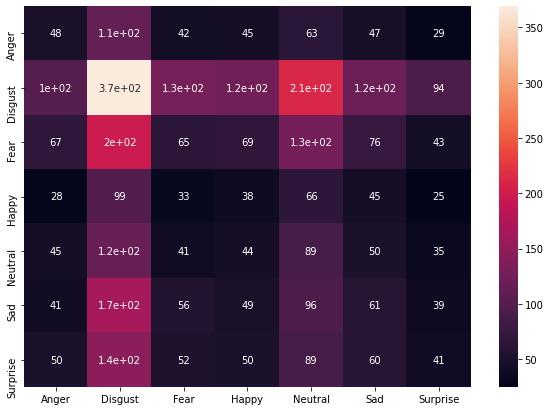

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
df_cm = pd.DataFrame(cm, index = ['Anger','Disgust','Fear','Happy','Neutral','Sad','Surprise'],
                  columns = ['Anger','Disgust','Fear','Happy','Neutral','Sad','Surprise'])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

# Audio Recognition

In [10]:
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import os
emotions = ['Anger', 'Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']
path = '/content/drive/MyDrive/Emotion_rec Data/Audio/'
training_file_names = []
training_emotion_labels = []
for i in range(0, len(emotions)):
    sub_path = path + 'Train_Aud/' + emotions[i] + '/'
    sub_file_names = [os.path.join(sub_path, f) for f in os.listdir(sub_path)]
    sub_emotion_labels = [i] * len(sub_file_names)
    training_file_names += sub_file_names
    training_emotion_labels += sub_emotion_labels

In [2]:
import os
emotions = ['Anger', 'Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']
path = '/content/drive/MyDrive/Emotion_rec Data/Audio/'
testing_file_names = []
testing_emotion_labels = []
for i in range(0, len(emotions)):
    sub_path = path + 'Test_Aud/' + emotions[i] + '/'
    sub_file_names = [os.path.join(sub_path, f) for f in os.listdir(sub_path)]
    sub_emotion_labels = [i] * len(sub_file_names)
    testing_file_names += sub_file_names
    testing_emotion_labels += sub_emotion_labels

In [3]:
import time
import librosa
import os
import numpy as np
def mfcc(data,new_audio):
  if data != None:
    if data=='Train':
      path = '/content/drive/MyDrive/Emotion_rec Data/Audio/Train_Aud'
    else:
      path = '/content/drive/MyDrive/Emotion_rec Data/Audio/Test_Aud'
    Classes = ["Anger","Disgust","Fear","Happy","Neutral","Sad","Surprise"]
    lst = []
    for emotion in Classes:
      path1 = os.path.join(path, emotion)
      emotion_num = Classes.index(emotion)
      for aud in os.listdir(path1):
        try:
          os.chdir(path1)
          #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
          X, sample_rate = librosa.load(aud, res_type='kaiser_fast')
          mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13).T,axis=0)
          #melspec = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
          #print(mfccs,emotion_num)
          arr = mfccs
          lst.append(arr)
        # If the file is not valid, skip it
        except ValueError:
          continue
    return lst
  else:
    lst = []
    X, sample_rate = librosa.load(new_audio, res_type='kaiser_fast')
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13).T,axis=0)
    #melspec = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    arr = mfccs
    lst.append(arr)
    return lst


In [4]:
lst = mfcc(data='Train',new_audio=None)
lst_1 = mfcc(data='Test',new_audio=None)

In [5]:
from imblearn.over_sampling import SMOTE
from collections import Counter
strategy = {0:5000,1:50000,2:50000,3:50000,4:50000,5:50000,6:50000}
oversample = SMOTE(sampling_strategy=strategy)
X_train, y_train = oversample.fit_resample(lst, training_emotion_labels)

counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y_train) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (5000) in class 0 will be larger than the number of samples in the majority class (class #4 -> 371)
  n_samples_majority))
/usr/lo

Class=0, n=5000 (1.639%)
Class=1, n=50000 (16.393%)
Class=2, n=50000 (16.393%)
Class=3, n=50000 (16.393%)
Class=4, n=50000 (16.393%)
Class=5, n=50000 (16.393%)
Class=6, n=50000 (16.393%)


In [6]:
from imblearn.over_sampling import SMOTE
from collections import Counter
strategy = {4:5000}
oversample = SMOTE(sampling_strategy=strategy)
X_test_rf, y_test_rf = oversample.fit_resample(lst_1, testing_emotion_labels)

counter = Counter(y_test_rf)
for k,v in counter.items():
	per = v / len(y_test_rf) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=0, n=74 (1.361%)
Class=1, n=39 (0.717%)
Class=2, n=18 (0.331%)
Class=3, n=205 (3.769%)
Class=4, n=5000 (91.929%)
Class=5, n=100 (1.839%)
Class=6, n=3 (0.055%)


/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (5000) in class 4 will be larger than the number of samples in the majority class (class #4 -> 234)
  n_samples_majority))
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
import pandas as pd
from sklearn.metrics import confusion_matrix
clf = RandomForestClassifier(n_estimators=1000)

clf.fit(X_train, y_train)

0.6122448979591837
Confusion Matrix


NameError: ignored

0.6122448979591837
Confusion Matrix
Classification Report
              precision    recall  f1-score   support

       Anger       0.04      0.23      0.06        74
     Disgust       0.00      0.03      0.01        39
        Fear       0.00      0.00      0.00        18
       Happy       0.07      0.36      0.12       205
     Neutral       0.94      0.65      0.77      5000
         Sad       0.03      0.09      0.05       100
    Surprise       0.00      0.00      0.00         3

    accuracy                           0.61      5439
   macro avg       0.16      0.19      0.14      5439
weighted avg       0.87      0.61      0.71      5439



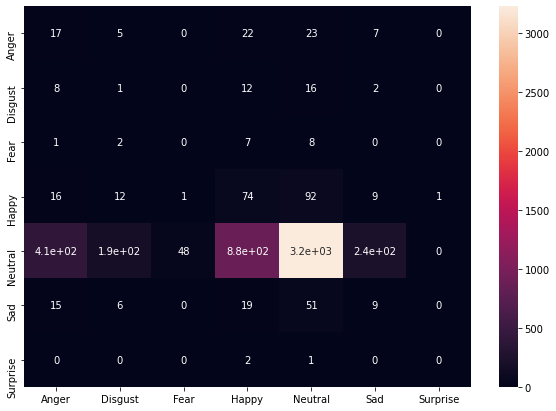

In [12]:
from sklearn.metrics import accuracy_score,classification_report

y_pred_rf = clf.predict(X_test_rf)


cf = confusion_matrix(y_test_rf,y_pred_rf)

accuracy=accuracy_score(y_test_rf,y_pred_rf)

print(accuracy)

print('Confusion Matrix')

df_cm = pd.DataFrame(cf, index = ['Anger','Disgust','Fear','Happy','Neutral','Sad','Surprise'],
                  columns = ['Anger','Disgust','Fear','Happy','Neutral','Sad','Surprise'])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

print('Classification Report')
target_names = ["Anger","Disgust","Fear","Happy","Neutral","Sad","Surprise"]
print(classification_report(y_test_rf, y_pred_rf, target_names=target_names))

In [32]:
import pickle
filename = '/content/drive/MyDrive/Emotion_rec Data/rf_audio.sav'
pickle.dump(clf, open(filename, 'wb'))

# Text Recognition

In [14]:
import pandas as pd
df_train = pd.read_csv('/content/drive/MyDrive/Emotion_rec Data/csv/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Emotion_rec Data/csv/test.csv')

In [15]:
dict1={'Anger':0,'Disgust':1,'Fear':2,'Happy':3,'Neutral':4,'Sad':5,'Surprise':6}
df_train['class']=df_train['EmotionMaxVote'].replace(dict1)
df_test['class']=df_test['EmotionMaxVote'].replace(dict1)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 200)
X_train_1 = cv.fit_transform(df_train['Lemma_words']).toarray()
X_test_1 = cv.transform(df_test['Lemma_words']).toarray()

In [17]:
from imblearn.over_sampling import SMOTE
from collections import Counter
strategy = {4 :1500}
oversample = SMOTE(sampling_strategy=strategy)
X_train, y_train = oversample.fit_resample(X_train_1, df_train['class'].tolist())

counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y_train) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (1500) in class 4 will be larger than the number of samples in the majority class (class #4 -> 897)
  n_samples_majority))
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Class=4, n=1500 (48.340%)
Class=3, n=725 (23.364%)
Class=0, n=318 (10.248%)
Class=5, n=347 (11.183%)
Class=1, n=119 (3.835%)
Class=2, n=67 (2.159%)
Class=6, n=27 (0.870%)


In [18]:
from imblearn.over_sampling import SMOTE
from collections import Counter
strategy = {4:3000}
oversample = SMOTE(sampling_strategy=strategy)
X_test_mb, y_test_mb = oversample.fit_resample(X_test_1, df_test['class'].tolist())

counter = Counter(y_test_mb)
for k,v in counter.items():
	per = v / len(y_test_mb) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=4, n=3000 (74.590%)
Class=3, n=446 (11.089%)
Class=1, n=114 (2.834%)
Class=0, n=234 (5.818%)
Class=5, n=176 (4.376%)
Class=6, n=12 (0.298%)
Class=2, n=40 (0.995%)


/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (3000) in class 4 will be larger than the number of samples in the majority class (class #4 -> 478)
  n_samples_majority))
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0.7237692690203879
Confusion Matrix
Classification Report
              precision    recall  f1-score   support

       Anger       0.16      0.04      0.06       234
     Disgust       0.20      0.01      0.02       114
        Fear       0.00      0.00      0.00        40
       Happy       0.33      0.22      0.27       446
     Neutral       0.79      0.93      0.85      3000
         Sad       0.12      0.07      0.09       176
    Surprise       0.00      0.00      0.00        12

    accuracy                           0.72      4022
   macro avg       0.23      0.18      0.18      4022
weighted avg       0.64      0.72      0.67      4022



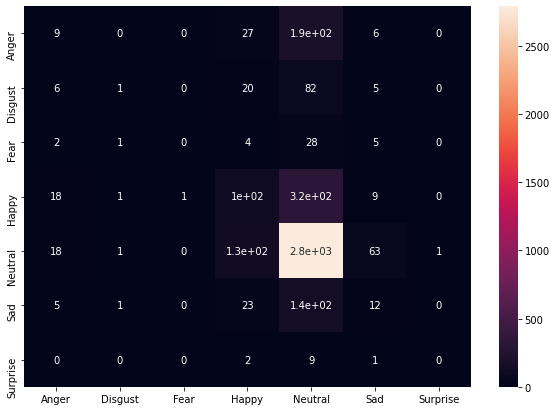

In [19]:
from sklearn.naive_bayes import MultinomialNB
mb = MultinomialNB().fit(X_train, y_train)

y_pred_mb=mb.predict(X_test_mb)

print(accuracy_score(y_test_mb,y_pred_mb))

print('Confusion Matrix')

cf = confusion_matrix(y_test_mb,y_pred_mb)

df_cm = pd.DataFrame(cf, index = ['Anger','Disgust','Fear','Happy','Neutral','Sad','Surprise'],
                  columns = ['Anger','Disgust','Fear','Happy','Neutral','Sad','Surprise'])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

print('Classification Report')
target_names = ["Anger","Disgust","Fear","Happy","Neutral","Sad","Surprise"]
print(classification_report(y_test_mb, y_pred_mb, target_names=target_names))

In [31]:
filename = '/content/drive/MyDrive/Emotion_rec Data/mul_text.sav'
pickle.dump(clf, open(filename, 'wb'))

# Load Weights for Image Recognition Model

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np


model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

# If you want to train the same model or try other models, go for this

model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])

model.load_weights('/content/drive/MyDrive/Emotion_rec Data/image_model.h5')

batch_size = 64
test_dir = '/content/Balanced Image data/Test_Croped_faces'

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

Y_pred = model.predict_generator(test_generator, test_generator.n//test_generator.batch_size+1)
y_pred_cnn = np.argmax(Y_pred, axis=1)
y_test_cnn = test_generator.classes

Found 3934 images belonging to 7 classes.
Instructions for updating:
Please use Model.predict, which supports generators.


# Custom Ensemble

In [28]:
y_pred_new = []
len_rf = len(y_pred_rf)
len_mb = len(y_pred_mb)
len_cnn = len(y_pred_cnn)

for i,j,k in zip(y_pred_rf,y_pred_mb,y_pred_cnn): 
  if (i==0 and j==0) or (j==0 and k==0) or (i==0 and k==0):
    y_pred_new.append(0)
  elif (i==1 and j==1) or (j==1 and k==1) or (i==1 and k==1):
    y_pred_new.append(1)
  elif (i==2 and j==2) or (j==2 and k==2) or (i==2 and k==2):
    y_pred_new.append(2)
  elif (i==3 and j==3) or (j==3 and k==3) or (i==3 and k==3):
    y_pred_new.append(3)
  elif (i==4 and j==4) or (j==4 and k==4) or (i==4 and k==4):
    y_pred_new.append(4)
  elif (i==5 and j==5) or (j==5 and k==5) or (i==5 and k==5):
    y_pred_new.append(5)
  elif (i==6 and j==6) or (j==6 and k==6) or (i==6 and k==6):
    y_pred_new.append(6) 
  else:
    if (len_rf > len_mb) and (len_rf > len_cnn):
      y_pred_new.append(i)
    elif (len_rf < len_mb) and (len_mb > len_cnn):
      y_pred_new.append(j)
    else:
      y_pred_new.append(k)




In [29]:
y_test_new = []
len_rf = len(y_test_rf)
len_mb = len(y_test_mb)
len_cnn = len(y_test_cnn)

for i,j,k in zip(y_test_rf,y_test_mb,y_test_cnn): 
  if (i==0 and j==0) or (j==0 and k==0) or (i==0 and k==0):
    y_test_new.append(0)
  elif (i==1 and j==1) or (j==1 and k==1) or (i==1 and k==1):
    y_test_new.append(1)
  elif (i==2 and j==2) or (j==2 and k==2) or (i==2 and k==2):
    y_test_new.append(2)
  elif (i==3 and j==3) or (j==3 and k==3) or (i==3 and k==3):
    y_test_new.append(3)
  elif (i==4 and j==4) or (j==4 and k==4) or (i==4 and k==4):
    y_test_new.append(4)
  elif (i==5 and j==5) or (j==5 and k==5) or (i==5 and k==5):
    y_test_new.append(5)
  elif (i==6 and j==6) or (j==6 and k==6) or (i==6 and k==6):
    y_test_new.append(6) 
  else:
    if (len_rf > len_mb) and (len_rf > len_cnn):
      y_test_new.append(i)
    elif (len_rf < len_mb) and (len_mb > len_cnn):
      y_test_new.append(j)
    else:
      y_test_new.append(k)

0.6326893746822573
Classification Report
              precision    recall  f1-score   support

       Anger       0.06      0.19      0.09       101
     Disgust       0.03      0.04      0.04        89
        Fear       0.00      0.00      0.00        17
       Happy       0.08      0.27      0.12       185
     Neutral       0.91      0.70      0.79      3449
         Sad       0.06      0.11      0.08        90
    Surprise       0.00      0.00      0.00         3

    accuracy                           0.63      3934
   macro avg       0.16      0.19      0.16      3934
weighted avg       0.80      0.63      0.70      3934



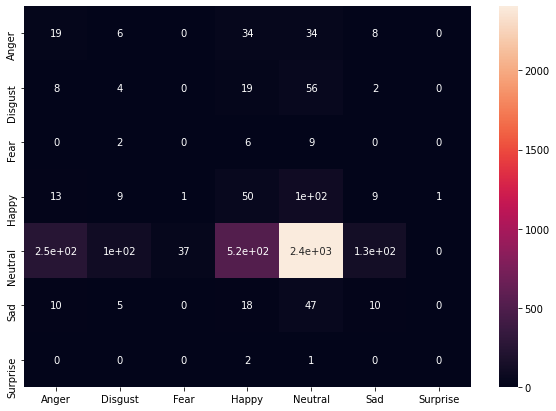

In [30]:
print(accuracy_score(y_test_new,y_pred_new))

cf = confusion_matrix(y_test_new,y_pred_new)

df_cm = pd.DataFrame(cf, index = ['Anger','Disgust','Fear','Happy','Neutral','Sad','Surprise'],
                  columns = ['Anger','Disgust','Fear','Happy','Neutral','Sad','Surprise'])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

print('Classification Report')
target_names = ["Anger","Disgust","Fear","Happy","Neutral","Sad","Surprise"]
print(classification_report(y_test_new, y_pred_new, target_names=target_names))

In [ ]:
'''import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import cv2
import numpy as np
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image

def check_class(num):
  if num==0:
    return 'Anger'
  elif num==1:
    return 'Disgust'
  elif num==2:
    return 'Fear'
  elif num==3:
    return 'Happy'
  elif num==4:
    return 'Neutral'
  elif num==5:
    return 'Sad'
  elif num==6:
    return 'Surprise'

#prediction for audio

#audio = '/content/drive/MyDrive/Emotion_rec Data/Audio/Val_Aud/Anger/32f7de930_1_utterance_2.mp4.mp3'
#mfcc_audio = mfcc(data=None,new_audio=audio)
#prediction_rf=clf.predict_proba(mfcc_audio)

#prediction for text

text = "any sales on in Christmas time"
wordnet_lemmatizer = WordNetLemmatizer()
word_tokens = text.split(" ")
text_for_prediction = [wordnet_lemmatizer.lemmatize(test) for test in word_tokens]
text_for_prediction = cv.transform(text_for_prediction).toarray()
prediction_mb=mb.predict_proba(text_for_prediction)
if len(prediction_mb)==6:
  prediction_mb = [np.max(prediction_mb[0]),np.max(prediction_mb[1]),np.max(prediction_mb[2]),np.max(prediction_mb[3]),np.max(prediction_mb[4]),np.max(prediction_mb[5])]
elif len(prediction_mb)==7:
  prediction_mb = [np.max(prediction_mb[0]),np.max(prediction_mb[1]),np.max(prediction_mb[2]),np.max(prediction_mb[3]),np.max(prediction_mb[4]),np.max(prediction_mb[5]),np.max(prediction_mb[6])]



#prediction for image


img = cv2.imread("/content/drive/MyDrive/Emotion_rec Data/Images_face/Test_Croped_faces/Anger/cropped_face0af72f957_1_utterance_2.mp4frame1.jpg")
img = cv2.resize(img, (48, 48))
img = np.reshape(img, [3, 48, 48, 1])
prediction_classes = model.predict(img)

class1_index=np.argmax(prediction_rf)
class2_index=prediction_mb.index(max(prediction_mb))
class3_index=np.argmax(prediction_classes)

list_1=[np.max(prediction_rf),np.max(prediction_mb),np.max(prediction_classes)]

if list_1.index(max(list_1)) == 0:
  print("Predicted class is ",check_class(class1_index))
elif list_1.index(max(list_1)) == 1:
  print("Predicted class is ",check_class(class2_index))
elif list_1.index(max(list_1)) == 2:
  print("Predicted class is ",check_class(class3_index))'''

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Predicted class is  Neutral


# Fail Models for Image Recognition

# VGG19

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input as Vgg16processInput
from keras.applications.resnet import ResNet50
from keras.applications.resnet import preprocess_input as ResNet50_processInput
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input as InceptionV3_processInput
from keras.applications.xception import Xception
from keras.applications.xception import preprocess_input as Xception_processInput

from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input as Vgg19processInput
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from keras import optimizers
from keras.layers import Dense,GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint ,EarlyStopping,ReduceLROnPlateau
from sklearn.metrics import auc
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
import sklearn
import seaborn as sn
import pandas as pd

In [ ]:
#Some usefull Functions to use for training

'''Dictionery to map model names'''
MODELS = {
	"vgg16": VGG16,
	"vgg19": VGG19,
	"inception": InceptionV3,
	"xception": Xception, # TensorFlow ONLY
	"resnet": ResNet50
}

#'''Function to generate data generator from directory'''
def get_generator(path_dir,processinput,img_size,batchsize,shuffle_status):

  datagen=ImageDataGenerator(preprocessing_function=processinput) #included in our dependencies
  generator1=datagen.flow_from_directory(path_dir,
                                         target_size=img_size,
                                         color_mode='rgb',
                                         batch_size=batchsize,
                                         class_mode='categorical',
                                         shuffle=shuffle_status)
  return generator1

#'''This function will return a corresponding model with given model name'''
def get_pretrained_model(modelname,freeze):
  Network = MODELS[modelname]
  model = Network(weights="imagenet",include_top=False)
  if freeze:
    for layer in model.layers:
      layer.trainable = False
  return model

#'''This function will add new dense layers to the input model'''
def add_dense(input_model,numbers_list):
  x = input_model.output
  for i in range(len(numbers_list)-1):
    x = Dense(numbers_list[i], activation='relu')(x)
  output = Dense(numbers_list[-1], activation='softmax')(x)
  model = Model(inputs=input_model.inputs, outputs=output)
  return model


#This function will add Global average pooling layer to the input model
def add_GAP(input_model):
  x = input_model.output
  x=GlobalAveragePooling2D()(x)
  # define new model
  model = Model(inputs=input_model.inputs, outputs=x)
  return model

#This function will store callbacks
def mycallbacks(checkpoint_name):

  ModelCheckpointcheckpoint = ModelCheckpoint(checkpoint_name,monitor='val_loss',mode='min',save_best_only=True,verbose=1)
  #EarlyStoppingearlystop = EarlyStopping(monitor = 'val_loss',min_delta = 0,patience = 60,verbose = 1,restore_best_weights = True)
  reducelr=ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
  callbacks=[ModelCheckpointcheckpoint,reducelr]
  return callbacks

#this function will return 
def get_prediction(model,test_generator):
  preds = model.predict_generator(test_generator)
  return preds

def start_training(model,train_generator,val_generator,myepochs,callbacks):
  step_size_train=train_generator.n//train_generator.batch_size
  val_size=val_generator.n//val_generator.batch_size
  #Training
  history = model.fit(train_generator,
                                steps_per_epoch=step_size_train,
                                epochs=myepochs,
                                validation_data=val_generator,
                                validation_steps=val_size,
                                callbacks=callbacks)
  return history

def extract_features(model,generator):

  #Extracting features of train,validation and test data
  data_y = generator.classes
  data_x = model.predict_generator(generator)
  return data_x,data_y

'''This function will return a neural network with dense layers'''
def get_neural_model(input_size,neurons_list):

  visible = Input(shape=(input_size,))
  for i in range(len(neurons_list)-1):
    x = Dense(10, activation='relu')(visible)
  output = Dense(7, activation='softmax')(x)
  model = Model(inputs=visible, outputs=output)
  return model

def test(model,generator):
  loss,acc= model.evaluate_generator(generator)
  return loss,acc

# This function is plotting confusion matrix.
def draw_confusion_matrix(cm,test_y):
  df_cm = pd.DataFrame(cm, columns=np.unique(test_y), index = np.unique(test_y))
  df_cm.index.name = 'Actual'
  df_cm.columns.name = 'Predicted'
  plt.figure(figsize = (6,3))
  sn.set(font_scale=1.4) #for label size
  sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 16})

#this function will plot accuracy and loss curve
def plot_curve(train,val,string1):
  plt.plot(train,'k--')
  plt.plot(val,'k--')
  plt.title('model '+string1)
  plt.ylabel(string1)
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

In [ ]:
#Some important variable initializers
batchsize = 32
img_size = (150,150)
myepochs = 40

numbers_list = [256,7]

#Building Xception model
print("Building VGG19 model")
model1 = get_pretrained_model('vgg19',freeze = True)
model1 = add_GAP(model1)
model1 = add_dense(model1,numbers_list)

#Declaring neural network
checkpoint_name='vgg19.h5'
callback1 = mycallbacks(checkpoint_name)
#sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model1.summary()

#declaring generators
print("Declaring data generators..")
processinput = Vgg19processInput
train_gen = get_generator('/content/drive/MyDrive/Emotion_rec Data/Balanced Image data/Train_Croped_faces (1)',processinput,img_size,batchsize,True)
val_gen = get_generator('/content/drive/MyDrive/Emotion_rec Data/New Face data/val_Croped_faces',processinput,img_size,batchsize,True)
test_gen = get_generator('/content/drive/MyDrive/Emotion_rec Data/Balanced Image data/Test_Croped_faces',processinput,img_size,batchsize,False)

#training the model
hist = start_training(model1,train_gen,val_gen,myepochs,callback1)

Building VGG19 model
80142336/80134624 [==============================] - 1s 0us/step
Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
__________________________________

In [ ]:
step_size_test=test_gen.n//test_gen.batch_size
loss,acc = model1.evaluate_generator(test_gen,step_size_test,verbose=0)
print("Testing Results => Acc: ",round(acc,2)*100,"Loss: ",round(loss,2))

test_y = test_gen.classes
y_pred = model1.predict_generator(test_gen)
predict_class=np.argmax(y_pred,axis=1)

# Report of Precision, Recall, F1_score
print ('Report : ')
print (classification_report(test_y, predict_class) )

print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))

Instructions for updating:
Please use Model.evaluate, which supports generators.
Testing Results => Acc:  18.0 Loss:  4.31
Instructions for updating:
Please use Model.predict, which supports generators.
Report : 
              precision    recall  f1-score   support

           0       0.07      0.16      0.10       119
           1       0.22      0.26      0.24       273
           2       0.40      0.08      0.14       277
           3       0.35      0.19      0.24       155
           4       0.22      0.37      0.27       174
           5       0.12      0.24      0.16       148
           6       0.00      0.00      0.00       204

    accuracy                           0.18      1350
   macro avg       0.20      0.19      0.16      1350
weighted avg       0.21      0.18      0.17      1350

Confusion Matrix


NameError: ignored